In [ ]:
import numpy as np
import pandas as pd
from pandas import Series
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
conn = sqlite3.connect('players_game_log.db')

df = pd.read_sql_query('SELECT * FROM playerslog', conn)
df.head()

,id,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,DREB,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE
0,0,22013,203506,0021301227,"APR 16, 2014",ORL vs. IND,L,17,2,8,...,2,2,1,1,0,2,2,4,-7,1
1,1,22013,203506,0021301208,"APR 14, 2014",ORL @ CHI,L,23,3,8,...,3,3,4,1,0,3,1,10,3,1
2,2,22013,203506,0021301199,"APR 13, 2014",ORL @ BKN,L,26,5,8,...,2,2,1,2,0,6,2,14,-13,1
3,3,22013,203506,0021301176,"APR 11, 2014",ORL vs. WAS,L,16,3,5,...,2,2,1,2,0,3,5,6,-9,1
4,4,22013,203506,0021301163,"APR 09, 2014",ORL vs. BKN,W,19,4,8,...,3,3,6,1,0,3,0,9,14,1


In [3]:
df.insert(len(df.columns), 'PLAYING%',
         Series(df.MIN/60))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12015 entries, 0 to 12014
Data columns (total 29 columns):
id                 12015 non-null int64
SEASON_ID          12015 non-null object
Player_ID          12015 non-null int64
Game_ID            12015 non-null object
GAME_DATE          12015 non-null object
MATCHUP            12015 non-null object
WL                 12013 non-null object
MIN                12015 non-null int64
FGM                12015 non-null int64
FGA                12015 non-null int64
FG_PCT             12015 non-null float64
FG3M               12015 non-null int64
FG3A               12015 non-null int64
FG3_PCT            12015 non-null float64
FTM                12015 non-null int64
FTA                12015 non-null int64
FT_PCT             12015 non-null float64
OREB               12015 non-null int64
DREB               12015 non-null int64
REB                12015 non-null int64
AST                12015 non-null int64
STL                12015 non-null int64


In [4]:
df.head()

,id,SEASON_ID,Player_ID,Game_ID,GAME_DATE,MATCHUP,WL,MIN,FGM,FGA,...,REB,AST,STL,BLK,TOV,PF,PTS,PLUS_MINUS,VIDEO_AVAILABLE,PLAYING%
0,0,22013,203506,0021301227,"APR 16, 2014",ORL vs. IND,L,17,2,8,...,2,1,1,0,2,2,4,-7,1,0.283333
1,1,22013,203506,0021301208,"APR 14, 2014",ORL @ CHI,L,23,3,8,...,3,4,1,0,3,1,10,3,1,0.383333
2,2,22013,203506,0021301199,"APR 13, 2014",ORL @ BKN,L,26,5,8,...,2,1,2,0,6,2,14,-13,1,0.433333
3,3,22013,203506,0021301176,"APR 11, 2014",ORL vs. WAS,L,16,3,5,...,2,1,2,0,3,5,6,-9,1,0.266667
4,4,22013,203506,0021301163,"APR 09, 2014",ORL vs. BKN,W,19,4,8,...,3,6,1,0,3,0,9,14,1,0.316667


In [5]:
df['PLAYING%'].mean()

0.5660604799556083

In [6]:
print(df.shape)
print(df.info())

(12015, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12015 entries, 0 to 12014
Data columns (total 29 columns):
id                 12015 non-null int64
SEASON_ID          12015 non-null object
Player_ID          12015 non-null int64
Game_ID            12015 non-null object
GAME_DATE          12015 non-null object
MATCHUP            12015 non-null object
WL                 12013 non-null object
MIN                12015 non-null int64
FGM                12015 non-null int64
FGA                12015 non-null int64
FG_PCT             12015 non-null float64
FG3M               12015 non-null int64
FG3A               12015 non-null int64
FG3_PCT            12015 non-null float64
FTM                12015 non-null int64
FTA                12015 non-null int64
FT_PCT             12015 non-null float64
OREB               12015 non-null int64
DREB               12015 non-null int64
REB                12015 non-null int64
AST                12015 non-null int64
STL                12015 non

In [7]:
df = df[['FG_PCT','FG3_PCT','PLAYING%', 'PTS', 'Player_ID']]

TS% = (PTS/2(FGA + (0.44 x FTA))) * 100

where:

PTS = points scored,
FGA = field goal attempts,
FTA = free throw attempts 

In [8]:
df.corr()['PTS']

FG_PCT       0.383177
FG3_PCT      0.340315
PLAYING%     0.574573
PTS          1.000000
Player_ID   -0.020502
Name: PTS, dtype: float64

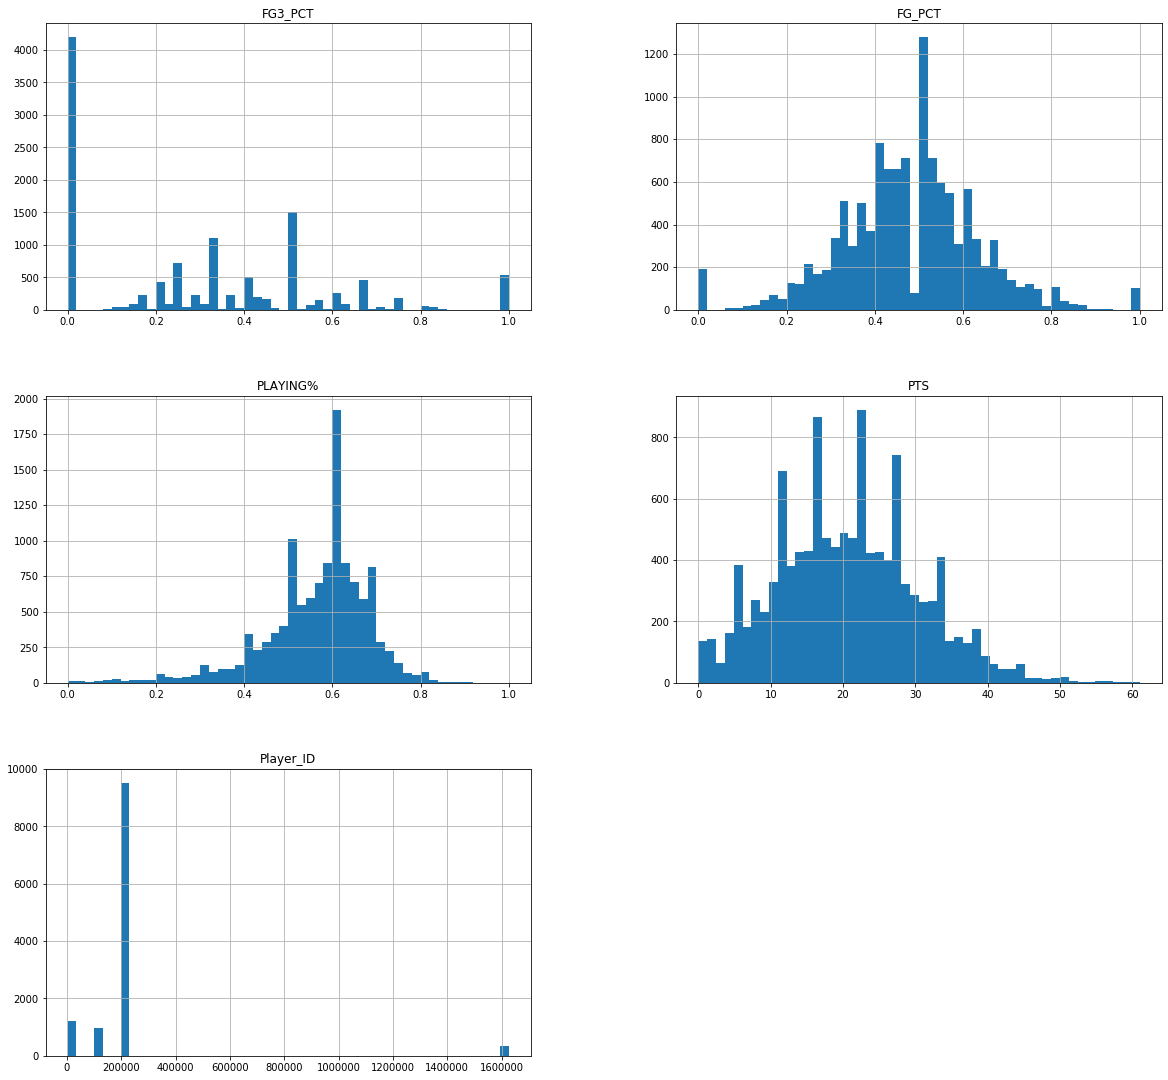

In [9]:
df.hist(bins=50, figsize=(20, 19))
plt.show()

In [10]:
#                0        1
# 0          VictorOladipo   203506
# 1      Karl-AnthonyTowns  1626157
# 2            NikolaJokic   203999
# 3            KyrieIrving   202681
# 4              AlHorford   201143
# 5          DamianLillard   203081
# 6             RudyGobert   203497
# 7          DraymondGreen   203110
# 8           KawhiLeonard   202695
# 9             PaulGeorge   202331
# 10           JimmyButler   202710
# 11            JoelEmbiid   203954
# 12             ChrisPaul   101108
# 13      RussellWestbrook   201566
# 14  GiannisAntetokounmpo   203507
# 15          AnthonyDavis   203076
# 16           JamesHarden   201935
# 17          StephenCurry   201939
# 18           KevinDurant   201142
# 19           LeBronJames     2544

In [11]:
oladip_df = df.loc[df['Player_ID']==203506]
towns_df = df.loc[df['Player_ID']==1626157]
jokic_df = df.loc[df['Player_ID']==203999]
irving_df = df.loc[df['Player_ID']==202681]
horford_df = df.loc[df['Player_ID']==201143]
lillard_df = df.loc[df['Player_ID']==203081]
gobert_df = df.loc[df['Player_ID']==203497]
green_df = df.loc[df['Player_ID']==203110]
leonard_df = df.loc[df['Player_ID']==202695]
george_df = df.loc[df['Player_ID']==202331]
butler_df = df.loc[df['Player_ID']==202710]
embiid_df = df.loc[df['Player_ID']==203954]
paul_df = df.loc[df['Player_ID']==101108]
westbrook_df = df.loc[df['Player_ID']==201566]
antetokounmpo_df = df.loc[df['Player_ID']==203507]
davis_df = df.loc[df['Player_ID']==203076]
harden_df = df.loc[df['Player_ID']==201935]
curry_df = df.loc[df['Player_ID']==201939]
durant_df = df.loc[df['Player_ID']==201142]
james_df = df.loc[df['Player_ID']==2544]

In [12]:
col_id = ['Player_ID']
oladip_df.drop(col_id, axis=1, inplace=True)
towns_df.drop(col_id, axis=1, inplace=True)
jokic_df.drop(col_id, axis=1, inplace=True)
irving_df.drop(col_id, axis=1, inplace=True)
horford_df.drop(col_id, axis=1, inplace=True)
lillard_df.drop(col_id, axis=1, inplace=True)
gobert_df.drop(col_id, axis=1, inplace=True)
green_df.drop(col_id, axis=1, inplace=True)
leonard_df.drop(col_id, axis=1, inplace=True)
george_df.drop(col_id, axis=1, inplace=True)
butler_df.drop(col_id, axis=1, inplace=True)
embiid_df.drop(col_id, axis=1, inplace=True)
paul_df.drop(col_id, axis=1, inplace=True)
westbrook_df.drop(col_id, axis=1, inplace=True)
antetokounmpo_df.drop(col_id, axis=1, inplace=True)
davis_df.drop(col_id, axis=1, inplace=True)
harden_df.drop(col_id, axis=1, inplace=True)
curry_df.drop(col_id, axis=1, inplace=True)
durant_df.drop(col_id, axis=1, inplace=True)
james_df.drop(col_id, axis=1, inplace=True)

C:\Users\ktung\Anaconda3\envs\PythonData\lib\site-packages\pandas\core\frame.py:4097: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [13]:
james_df.head()

,FG_PCT,FG3_PCT,PLAYING%,PTS
10810,0.471,0.00,0.583333,17
10811,0.450,0.25,0.750000,27
10812,0.364,0.00,0.533333,10
10813,0.429,1.00,0.700000,24
10814,0.364,0.00,0.600000,14


In [14]:
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.svm import LinearSVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import VotingRegressor
from sklearn.externals import joblib

C:\Users\ktung\Anaconda3\envs\PythonData\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [15]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [ ]:
# col_id = ['Player_ID']
# oladip_df.drop(col_id, axis=1, inplace=True)
# towns_df.drop(col_id, axis=1, inplace=True)
# jokic_df.drop(col_id, axis=1, inplace=True)
# irving_df.drop(col_id, axis=1, inplace=True)
# horford_df.drop(col_id, axis=1, inplace=True)
# lillard_df.drop(col_id, axis=1, inplace=True)
# gobert_df.drop(col_id, axis=1, inplace=True)
# green_df.drop(col_id, axis=1, inplace=True)
# leonard_df.drop(col_id, axis=1, inplace=True)
# george_df.drop(col_id, axis=1, inplace=True)
# butler_df.drop(col_id, axis=1, inplace=True)
# embiid_df.drop(col_id, axis=1, inplace=True)
# paul_df.drop(col_id, axis=1, inplace=True)
# westbrook_df.drop(col_id, axis=1, inplace=True)
# antetokounmpo_df.drop(col_id, axis=1, inplace=True)
# davis_df.drop(col_id, axis=1, inplace=True)
# harden_df.drop(col_id, axis=1, inplace=True)
# curry_df.drop(col_id, axis=1, inplace=True)
# durant_df.drop(col_id, axis=1, inplace=True)
# james_df.drop(col_id, axis=1, inplace=True)

In [37]:
y = np.array(james_df['PTS']).astype(int)
X = james_df.drop('PTS', 1)



df = (X.mean(axis=0), X.std(axis=0))
df = pd.DataFrame(list(df))
df = df.rename(index={0: 'X_train mean',
               1: 'X_train std'})
df = df.rename(columns={0: 'FG_PCT',
                       1: 'FG3_PCT',
                       2: 'PLAYING%'})
# print(df)
LeBronJames_player_stat = df
LeBronJames_player_stat.to_pickle("individual_player_stat/LeBronJames_player_stat")

In [ ]:
#                0        1
# 0          VictorOladipo_player_stat   203506
# 1      Karl_AnthonyTowns_player_stat  1626157
# 2            NikolaJokic_player_stat   203999
# 3            KyrieIrving_player_stat   202681
# 4              AlHorford_player_stat   201143
# 5          DamianLillard_player_stat   203081
# 6             RudyGobert_player_stat   203497
# 7          DraymondGreen_player_stat   203110
# 8           KawhiLeonard_player_stat   202695
# 9             PaulGeorge_player_stat  202331
# 10           JimmyButler_player_stat   202710
# 11            JoelEmbiid_player_stat   203954
# 12             ChrisPaul_player_stat   101108
# 13      RussellWestbrook_player_stat  201566
# 14  GiannisAntetokounmpo_player_stat   203507
# 15          AnthonyDavis_player_stat  203076
# 16           JamesHarden_player_stat  201935
# 17          StephenCurry_player_stat   201939
# 18           KevinDurant_player_stat   201142
# 19           LeBronJames_player_stat     2544

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print(X_train.shape)
print(y_train.shape)

In [155]:
player_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())
])

X_train = player_pipeline.fit_transform(X_train)
X_test = player_pipeline.transform(X_test)

In [156]:
print(X_train.shape)
print(y_train.shape)

(301, 3)
(301,)


In [157]:
#                0        1
# 0          VictorOladipo_player_stat   203506
# 1      Karl_AnthonyTowns_player_stat  1626157
# 2            NikolaJokic_player_stat   203999
# 3            KyrieIrving_player_stat   202681
# 4              AlHorford_player_stat   201143
# 5          DamianLillard_player_stat   203081
# 6             RudyGobert_player_stat   203497
# 7          DraymondGreen_player_stat   203110
# 8           KawhiLeonard_player_stat   202695
# 9             PaulGeorge_player_stat  202331
# 10           JimmyButler_player_stat   202710
# 11            JoelEmbiid_player_stat   203954
# 12             ChrisPaul_player_stat   101108
# 13      RussellWestbrook_player_stat  201566
# 14  GiannisAntetokounmpo_player_stat   203507
# 15          AnthonyDavis_player_stat  203076
# 16           JamesHarden_player_stat  201935
# 17          StephenCurry_player_stat   201939
# 18           KevinDurant_player_stat   201142
# 19           LeBronJames_player_stat     2544

In [158]:
df = (X_train.mean(axis=0), X_train.std(axis=0))
df = pd.DataFrame(list(df))
df = df.rename(index={0: 'X_train mean',
               1: 'X_train std'})
df = df.rename(columns={0: 'FG_PCT',
                       1: 'FG3_PCT',
                       2: 'PLAYING%'})

VictorOladipo_player_stat = df
VictorOladipo_player_stat.to_pickle("individual_player_stat/VictorOladipo_player_stat")

In [17]:
def plot_learning_curves(model, X, y):
    if (model == 'lin_reg'):
        model = LinearRegression()
    if(model == 'svm_reg'):
        model = LinearSVR(random_state=42)
    if (model == 'tree_reg'):
        model = DecisionTreeRegressor()
    if (model == 'forest_reg'):
        model = RandomForestRegressor(n_estimators=100, random_state=42)
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, 10):#len(X_train)):
        
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
#         print(pd.Series(y_train_predict - y_train[:m]))
#         print(pd.DataFrame({'predict':y_train_predict, 'actual': y_train[:m]}))
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
    
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14)              # not shown
    return train_errors, val_errors

In [18]:
lin_reg = LinearRegression()
svm_reg = LinearSVR(random_state=42)
tree_reg = DecisionTreeRegressor()
forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)


In [19]:
named_estimators = [
    ('Linear_Regression', lin_reg),
    ('SVM', svm_reg),
    ('Decision_Tree', tree_reg),
    ('Random_Forest', forest_reg)
]

In [20]:
estimators = [lin_reg, svm_reg, tree_reg, forest_reg]
for estimator in estimators:
    print('Training the', estimator)
    estimator.fit(X_train, y_train)

Training the LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
Training the LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
          intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
          random_state=42, tol=0.0001, verbose=0)
Training the DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')
Training the RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, 

In [21]:
voting_reg = VotingRegressor(named_estimators)
voting_reg.fit(X_train, y_train)
voting_reg.score(X_test, y_test)


0.4895606846577515

In [22]:
voting_reg.estimators_

[LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 LinearSVR(C=1.0, dual=True, epsilon=0.0, fit_intercept=True,
           intercept_scaling=1.0, loss='epsilon_insensitive', max_iter=1000,
           random_state=42, tol=0.0001, verbose=0),
 DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort=False, random_state=None, splitter='best'),
 RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                       max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                 

In [23]:
[estimator.score(X_test, y_test) for estimator in voting_reg.estimators_]

[0.4757300908302019,
 0.4587361002543585,
 0.1064589391960088,
 0.4919027128382316]

([0.0,
  0.0,
  3.3658065289429835e-29,
  3.7865323450608567e-29,
  3.413484177300903,
  2.893646546380765,
  6.140113081892336,
  6.993800077868258,
  9.258817939357572],
 [109.47513812154696,
  109.47513812154696,
  71.27729490043714,
  104.17493794972765,
  42.25495260152356,
  42.08059684163897,
  49.969600433101554,
  52.60046690655581,
  45.27325470135193])

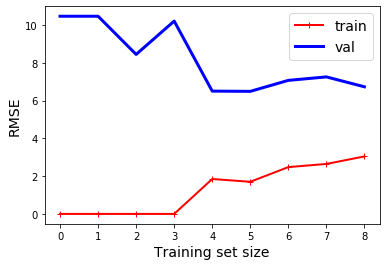

In [24]:
plot_learning_curves(lin_reg, X_train, y_train)

In [25]:
voting_pred = voting_reg.predict(X_test)
r2_score(y_test, voting_pred)


0.4895606846577515

In [26]:
voting_mse = mean_squared_error(y_test, voting_pred)
voting_rmse = np.sqrt(voting_mse)
print(voting_rmse)

5.59227519363366


In [27]:
player_df = pd.DataFrame({'Actual': y_test, 'Predict': voting_pred}).reset_index()


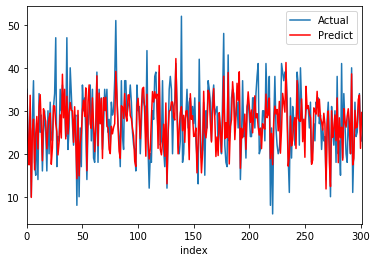

In [28]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)


In [29]:
lin_pred = lin_reg.predict(X_test)
r2_score(y_test, lin_pred)

0.2511742681052864

In [30]:
lin_mse = mean_squared_error(y_test, lin_pred)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

6.773402064713773


In [31]:
player_df = pd.DataFrame({'Actual': y_test, 'Predict': lin_pred}).reset_index()


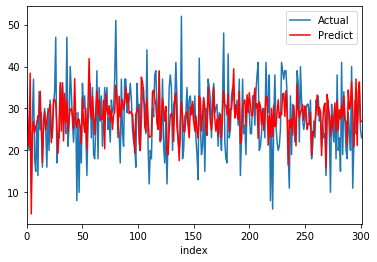

In [32]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)


In [33]:
tree_pred = tree_reg.predict(X_test)
r2_score(y_test, tree_pred)

0.14329399798090658

In [34]:

tree_mse = mean_squared_error(y_test, tree_pred)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

7.244899756364095

([0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0],
 [109.47513812154696,
  109.47513812154696,
  70.49171270718232,
  75.66850828729282,
  53.79558011049724,
  58.06629834254144,
  66.7292817679558,
  64.50828729281768,
  59.751381215469614])

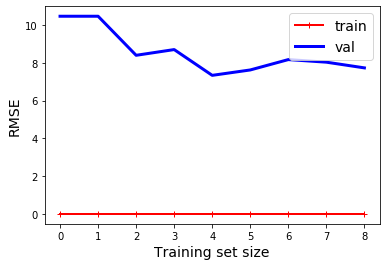

In [35]:
plot_learning_curves(tree_reg, X_train, y_train)

In [36]:
player_tree_df = pd.DataFrame({'Actual': y_test, 'Predict': tree_pred}).reset_index()


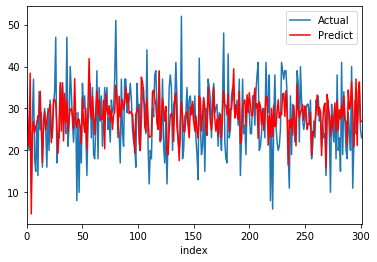

In [37]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)

In [38]:
svm_pred = svm_reg.predict(X_test)
r2_score(y_test, svm_pred)

0.4587361002543585

In [39]:
svm_mse = mean_squared_error(y_test, svm_pred)
svm_rmse = np.sqrt(svm_mse)
svm_mse

33.16209920967255

([993.9072911367894,
  612.393803121444,
  544.3446645494879,
  475.4760535267712,
  456.4984216887709,
  366.35964576633796,
  381.27310005115226,
  307.6537419825361,
  255.50534041401943],
 [696.8615695317919,
  640.1896847572231,
  599.2314032468977,
  553.7396491869298,
  510.177160665864,
  478.98377589920426,
  437.8774684151745,
  398.41360195696683,
  365.7097641946372])

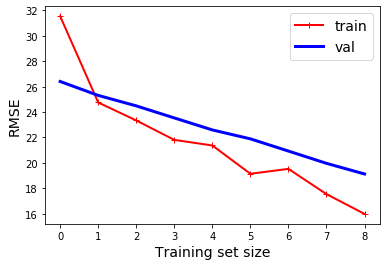

In [40]:
plot_learning_curves(svm_reg, X_train, y_train)

In [41]:
player_df = pd.DataFrame({'Actual': y_test, 'Predict': svm_pred}).reset_index()


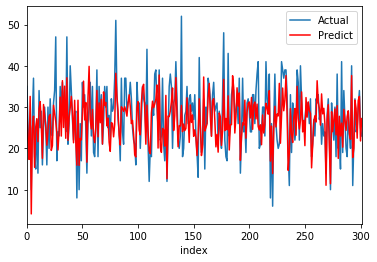

In [42]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)

In [43]:


forest_pred = forest_reg.predict(X_test)
r2_score(y_test, forest_pred)

0.4919027128382316

In [44]:

forest_mse = mean_squared_error(y_test, forest_pred)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

5.579431037940704

([0.0,
  0.0,
  10.015600000000006,
  4.341674999999999,
  2.912539999999998,
  2.4616000000000016,
  4.788014285714285,
  4.069025,
  3.6515999999999997],
 [109.47513812154696,
  109.47513812154696,
  54.57261436464088,
  50.64885635359116,
  47.488548618784534,
  47.50383038674033,
  49.63526132596685,
  50.68588011049724,
  44.85438839779006])

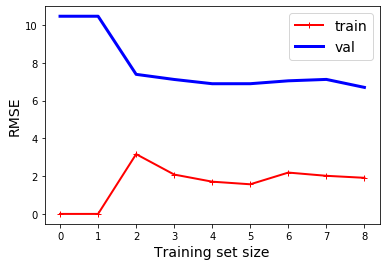

In [45]:
plot_learning_curves(forest_reg, X_train, y_train)

In [46]:
player_df = pd.DataFrame({'Actual': y_test, 'Predict': forest_pred}).reset_index()


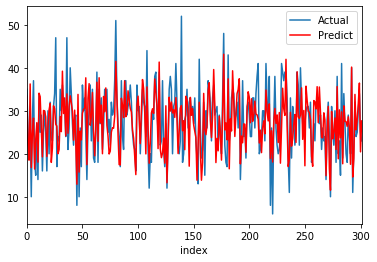

In [47]:
ax = plt.gca()

player_df.plot(kind='line', x='index', y='Actual', ax=ax)
player_df.plot(kind='line', x='index', y='Predict', color='red', ax=ax)

In [48]:
filename = 'LeBronJames_playerlog.model'

In [49]:
# joblib.dump(lin_reg, filename)
# joblib.dump(svm_reg, filename)
# joblib.dump(tree_reg, filename)
joblib.dump(forest_reg, filename)
# joblib.dump(voting_reg, filename)

['LeBronJames_playerlog.model']

In [50]:
loaded = joblib.load('LeBronJames_playerlog.model')

In [51]:
loaded

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [52]:
# lin_reg = LinearRegression()
# svm_reg = LinearSVR(random_state=42)
# tree_reg = DecisionTreeRegressor()
# forest_reg = RandomForestRegressor(n_estimators=100, random_state=42)


In [53]:
               0        1
# 0          VictorOladipo_playerlog.model   203506
# 1      Karl_AnthonyTowns_playerlog.model  1626157
# 2            NikolaJokic_playerlog.model   203999
# 3            KyrieIrving_playerlog.model   202681
# 4              AlHorford_playerlog.model   201143
# 5          DamianLillard_playerlog.model   203081
# 6             RudyGobert_playerlog.model   203497
# 7          DraymondGreen_playerlog.model   203110
# 8           KawhiLeonard_playerlog.model   202695
# 9             PaulGeorge_playerlog.model   202331
# 10           JimmyButler_playerlog.model   202710
# 11            JoelEmbiid_playerlog.model   203954
# 12             ChrisPaul_playerlog.model   101108
# 13      RussellWestbrook_playerlog.model   201566
# 14  GiannisAntetokounmpo_playerlog.model   203507
# 15          AnthonyDavis_playerlog.model   203076
# 16           JamesHarden_playerlog.model   201935
# 17          StephenCurry_playerlog.model   201939
# 18           KevinDurant_playerlog.model   201142
# 19           LeBronJames_playerlog.model     2544

SyntaxError: invalid syntax (<ipython-input-53-3a1aec7ba941>, line 1)